In [1]:
from pyIClab import Eluent, Detector
from pyIClab import __version__ as pyIClab__version__
import pint

pyIClab__version__

'2024.6.6.1'

In [2]:
eluent = Eluent.DIWater()
detector = Detector('DetectorDemo', freq='1 Hz')
eluent.assemble(detector)
eluent._cur_time = pint.Quantity('2 min')
detector.flush()
df1 = detector.get_signals(signal_type='concentration')
df2 = detector.get_signals(signal_type='conductivity', algorithm='ideal')
df3 = detector.get_signals(signal_type='conductivity', algorithm='realistic')

x1, y1 = df1['time'], df1['signal']
x2, y2 = df2['time'], df2['signal']
x3, y3 = df3['time'], df3['signal']

Calculating eluent conductivity on <Detector "DetectorDemo">...:   0%|          | 0/120 [00:00<?, ?it/s]

Calculating eluent conductivity on <Detector "DetectorDemo">...:   0%|          | 0/120 [00:00<?, ?it/s]

Text(0.5, 1.0, 'DI Water')

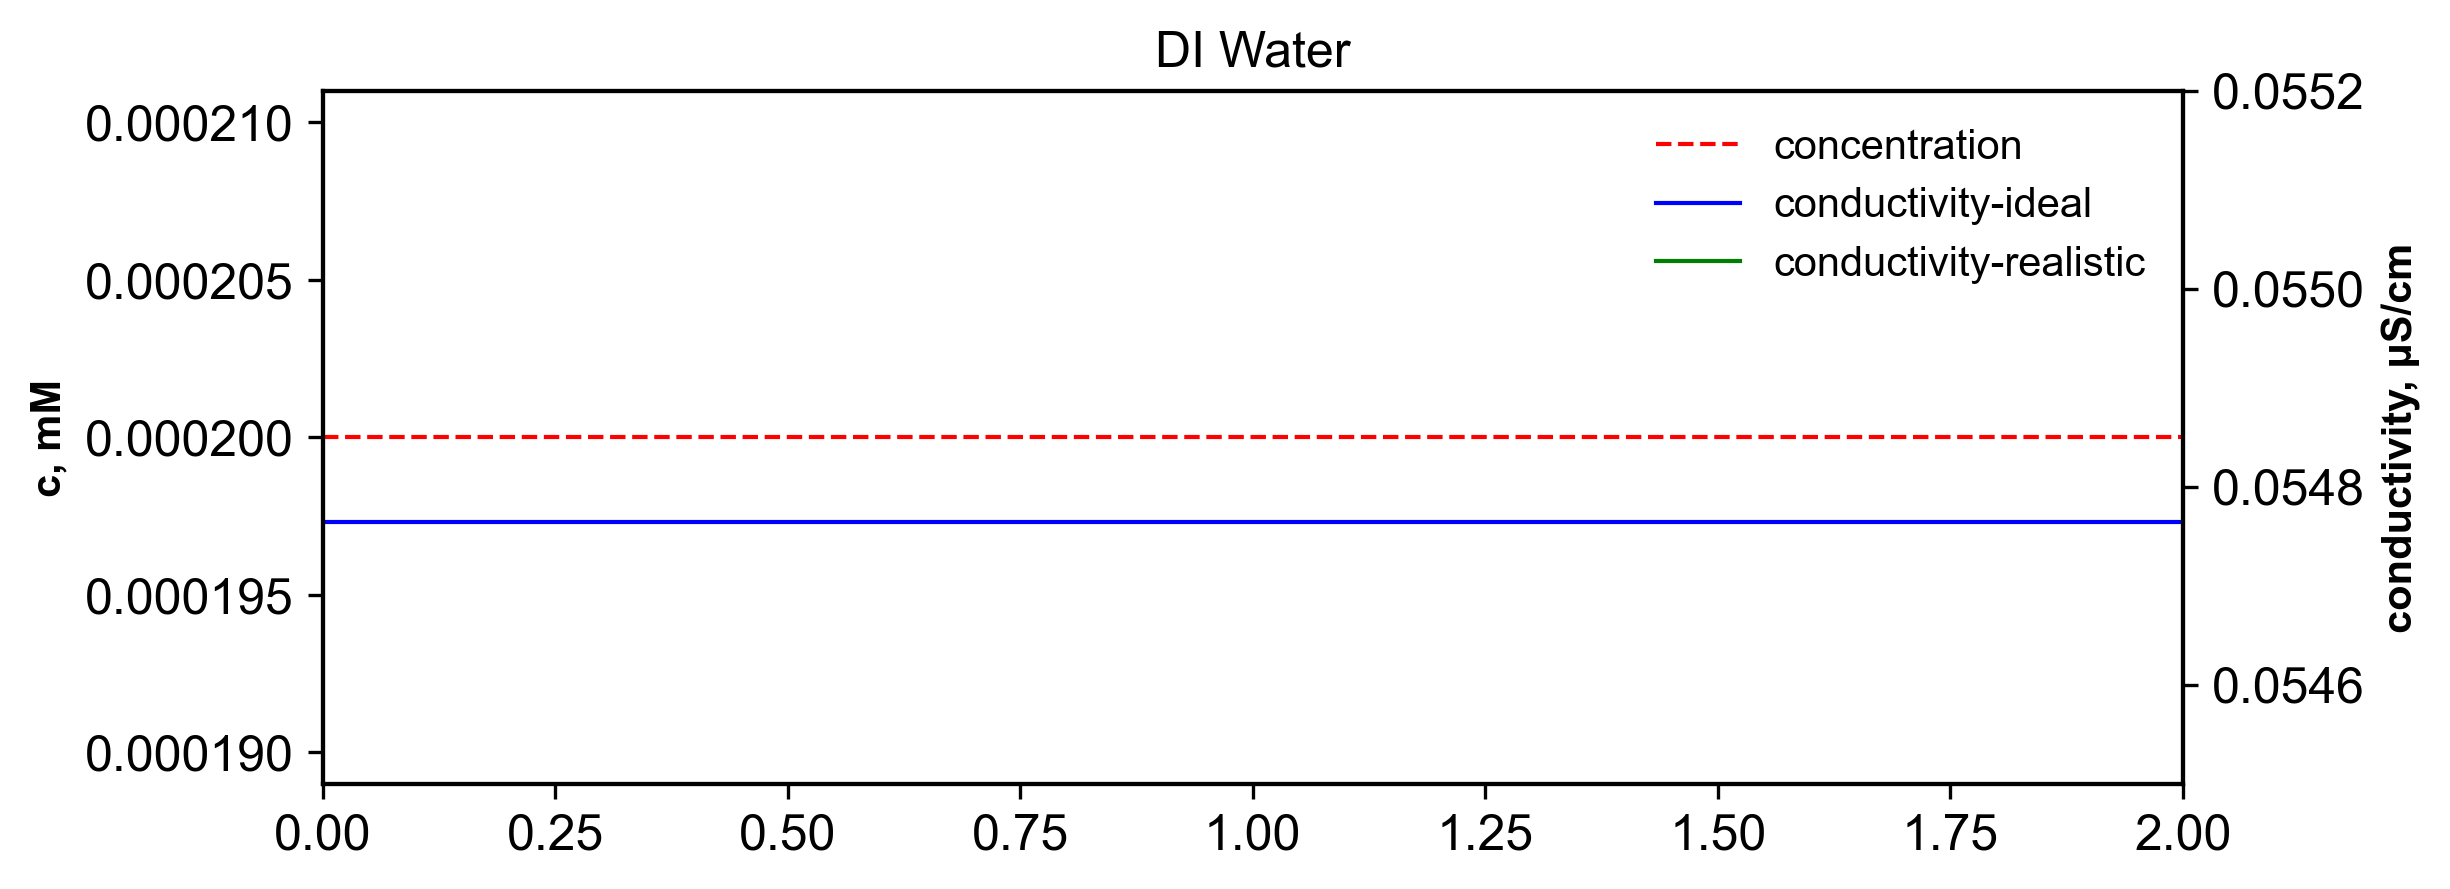

In [3]:
import matplotlib.pyplot as plt
from pyIClab.beadedbag import mpl_custom_rcconfig

plt.rcParams.update(mpl_custom_rcconfig)
fig, ax1 = plt.subplots()
(line1,) = ax1.plot(x1, y1, label='concentration', color='r', linestyle='--')
ax2 = ax1.twinx()
(line2,) = ax2.plot(x2, y2, label='conductivity-ideal', color='b')
(line3,) = ax2.plot(x3, y3, label='conductivity-realistic', color='g')
ax1.set_ylabel('c, mM', fontsize=10, fontweight='bold')
ax2.set_ylabel('conductivity, μS/cm', fontsize=10, fontweight='bold')
ax2.set(xlim=(0, 2), ylim=(0.0545, 0.0552))
ax1.legend([line1, line2, line3], [l.get_label() for l in [line1, line2, line3]])
ax1.set_title('DI Water')


In [4]:
eluent = Eluent('CarbonicAcid', profile={'H+': '4 mM', 'CO3-2': '2 mM'})
detector = Detector('DetectorDemo', freq='1 Hz')
eluent.assemble(detector)
eluent._cur_time = pint.Quantity('2 min')
detector.flush()
df1 = detector.get_signals(signal_type='concentration')
df2 = detector.get_signals(signal_type='conductivity', algorithm='ideal')
df3 = detector.get_signals(signal_type='conductivity', algorithm='realistic')

x1, y1 = df1['time'], df1['signal']
x2, y2 = df2['time'], df2['signal']
x3, y3 = df3['time'], df3['signal']

Calculating eluent conductivity on <Detector "DetectorDemo">...:   0%|          | 0/120 [00:00<?, ?it/s]

Calculating eluent conductivity on <Detector "DetectorDemo">...:   0%|          | 0/120 [00:00<?, ?it/s]

Text(0.5, 1.0, '2 mM H2CO3')

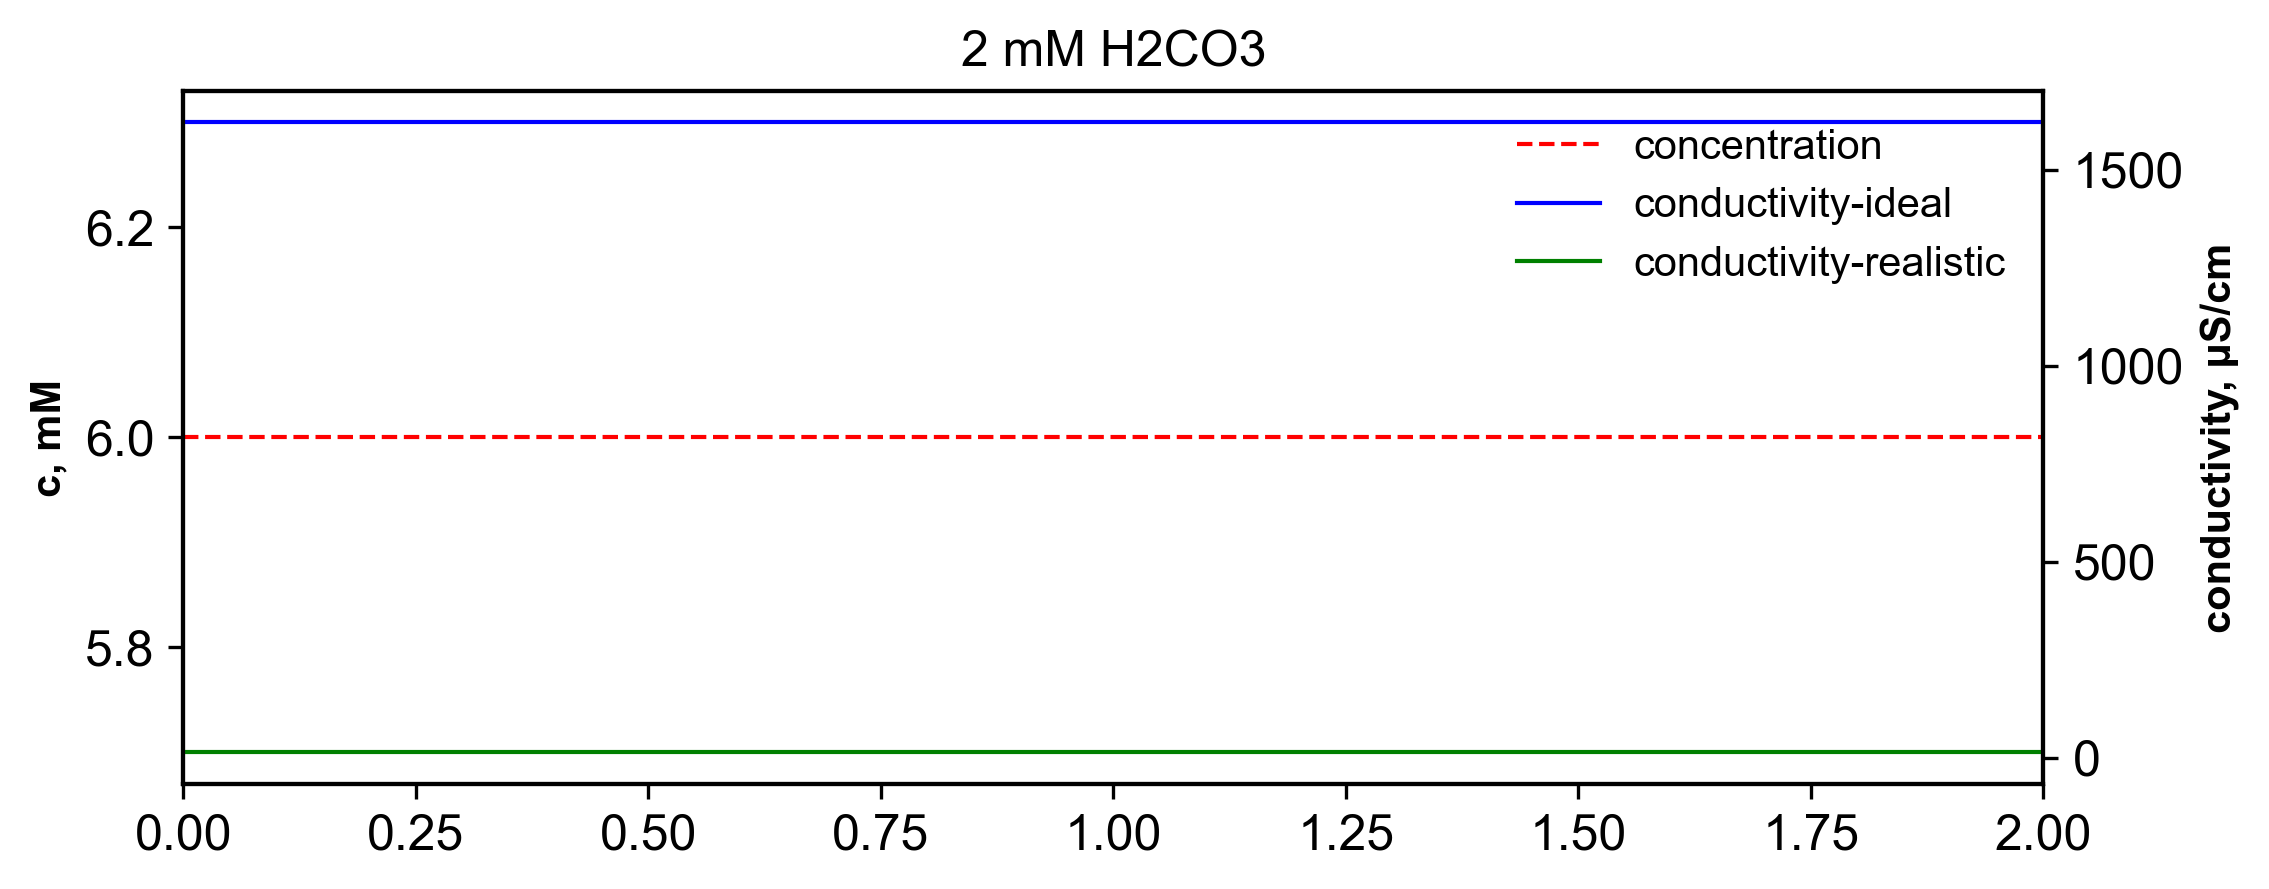

In [5]:
fig, ax1 = plt.subplots()
(line1,) = ax1.plot(x1, y1, label='concentration', color='r', linestyle='--')
ax2 = ax1.twinx()
(line2,) = ax2.plot(x2, y2, label='conductivity-ideal', color='b')
(line3,) = ax2.plot(x3, y3, label='conductivity-realistic', color='g')
ax1.set_ylabel('c, mM', fontsize=10, fontweight='bold')
ax2.set_ylabel('conductivity, μS/cm', fontsize=10, fontweight='bold')
ax2.set(xlim=(0, 2))
ax1.legend([line1, line2, line3], [l.get_label() for l in [line1, line2, line3]])
ax1.set_title('2 mM H2CO3')
